# Importing Dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

I have downloaded the dataset called "Audio Cats and Dogs" from kaggle and uploaded it on my Drive for convienience of access.

Link for the dataset is:
https://www.kaggle.com/mmoreaux/audio-cats-and-dogs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/cats_dogs/train

/content/drive/My Drive/cats_dogs/train


In [4]:
path_cats = "/content/drive/My Drive/cats_dogs/train/cat"
path_dogs = "/content/drive/My Drive/cats_dogs/train/dog"

# Data Preprocessing

###Loading the dataset

In [5]:
import librosa

In [6]:
audio_data = []
file_names = []
file_path = []

In [7]:
for file in os.listdir(path_cats):
    file_p = os.path.join(path_cats, file)
    audio, sr = librosa.load(file_p)
    audio_data.append(audio)
    file_names.append(file)
    file_path.append(file_p)

In [8]:
audio_dict = {"audio_data": audio_data, "file_names": file_names, "file_path" : file_p}

In [9]:
df1 = pd.DataFrame.from_dict(audio_dict)

In [10]:
for file in os.listdir(path_dogs):
    file_p = os.path.join(path_dogs, file)
    audio, sr = librosa.load(file_p)
    audio_data.append(audio)
    file_names.append(file)
    file_path.append(file_p)

audio_dict = {"audio_data": audio_data, "file_names": file_names, "file_path" : file_p}
df2 = pd.DataFrame.from_dict(audio_dict)

In [11]:
df = pd.concat([df1, df2])

In [12]:
df

,audio_data,file_names,file_path
0,"[-0.007235958, -0.008420195, -0.007199579, -0....",cat_120.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...
1,"[2.5589606e-12, 6.643401e-12, -9.881113e-13, 8...",cat_109.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...
2,"[1.8043375e-10, 5.6366034e-10, 9.913363e-10, 2...",cat_123.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...
3,"[-0.00025769664, -0.001130517, -0.0020371154, ...",cat_127.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...
4,"[-2.4815967e-11, 2.6111288e-12, -1.3502602e-12...",cat_125.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...
...,...,...,...
205,"[-0.00032150012, -0.0005554671, -0.0005659004,...",dog_barking_92.wav,/content/drive/My Drive/cats_dogs/train/dog/do...
206,"[-2.9690287e-05, -3.4207704e-05, -1.8153718e-0...",dog_barking_98.wav,/content/drive/My Drive/cats_dogs/train/dog/do...
207,"[-2.6687414e-05, -0.00012674289, -0.0002855656...",dog_barking_93.wav,/content/drive/My Drive/cats_dogs/train/dog/do...
208,"[0.0006277622, 0.0010207843, 0.0013325913, 0.0...",dog_barking_94.wav,/content/drive/My Drive/cats_dogs/train/dog/do...


The librosa.load() function returns two values:

1. The audio waveform data, as a one-dimensional NumPy array.
2. The sampling rate of the audio file, in samples per second.

The audio waveform data, as a one-dimensional NumPy array output of librosa, contains the time-varying amplitude of an audio signal sampled at a certain rate. Each element of the array represents the amplitude of the audio waveform at a particular point in time, and the sequence of these amplitudes over time forms the complete audio signal.

In more technical terms, the audio waveform data is a time-domain representation of the audio signal, where the amplitude values are sampled at regular intervals (usually in seconds) and stored as numerical values in the NumPy array. The values in the array are typically normalized to lie between -1 and 1, with 0 representing silence.

The audio waveform data can be analyzed and processed using various techniques to extract useful information about the audio signal, such as its frequency content, duration, and overall shape. This information can be used for tasks such as audio classification, feature extraction, and audio visualization.

In [13]:
Label=[]

In [14]:
for i in df['file_names']:

  if (i.startswith('cat_')):
    Label.append('cat')
  elif i.startswith('dog_'):
    Label.append('dog')

In [15]:
df['Label'] = Label

In [16]:
df

,audio_data,file_names,file_path,Label
0,"[-0.007235958, -0.008420195, -0.007199579, -0....",cat_120.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
1,"[2.5589606e-12, 6.643401e-12, -9.881113e-13, 8...",cat_109.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
2,"[1.8043375e-10, 5.6366034e-10, 9.913363e-10, 2...",cat_123.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
3,"[-0.00025769664, -0.001130517, -0.0020371154, ...",cat_127.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
4,"[-2.4815967e-11, 2.6111288e-12, -1.3502602e-12...",cat_125.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
...,...,...,...,...
205,"[-0.00032150012, -0.0005554671, -0.0005659004,...",dog_barking_92.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog
206,"[-2.9690287e-05, -3.4207704e-05, -1.8153718e-0...",dog_barking_98.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog
207,"[-2.6687414e-05, -0.00012674289, -0.0002855656...",dog_barking_93.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog
208,"[0.0006277622, 0.0010207843, 0.0013325913, 0.0...",dog_barking_94.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog


### Spectrogram from the waveform data

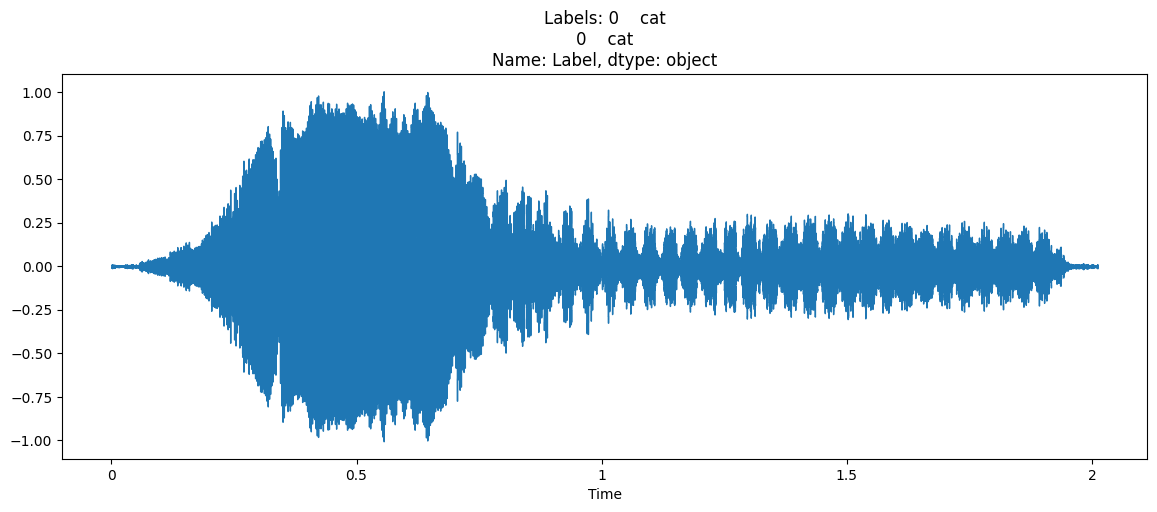

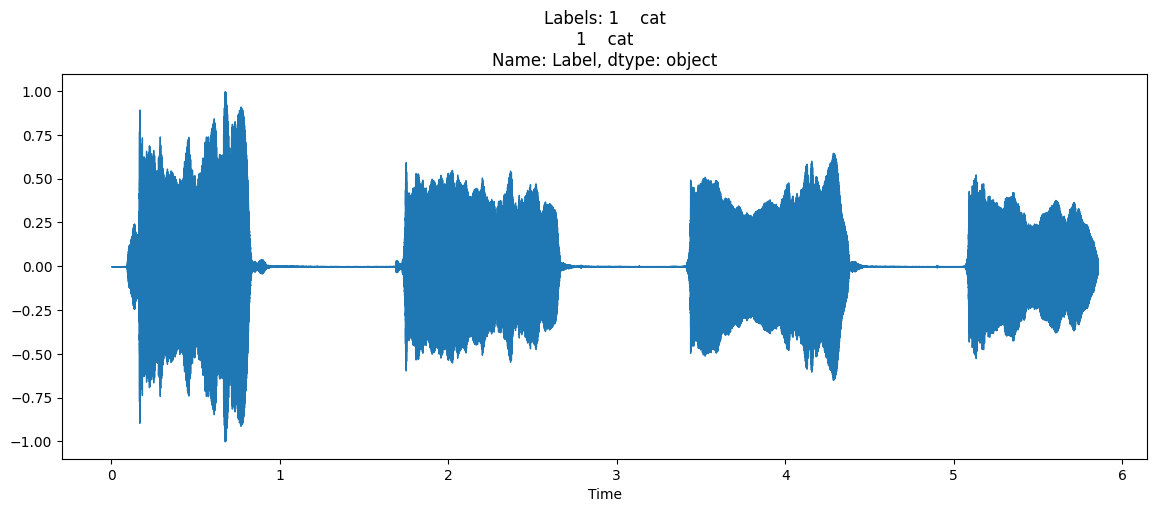

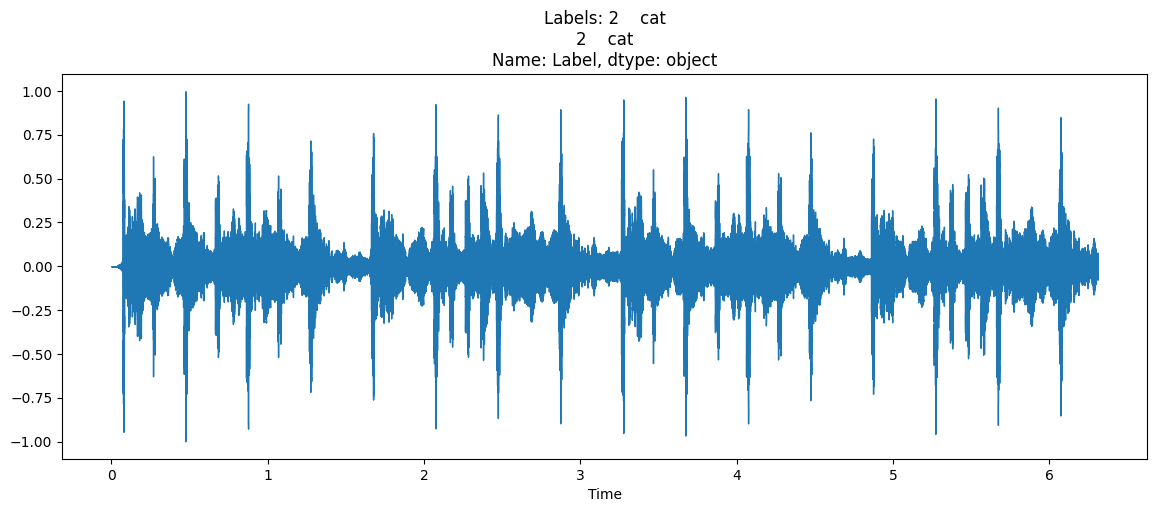

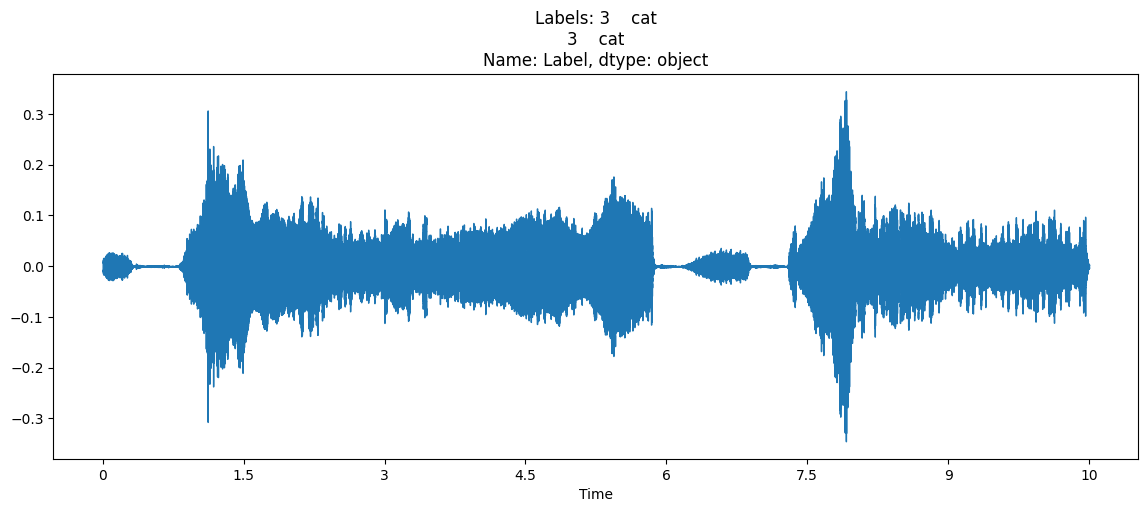

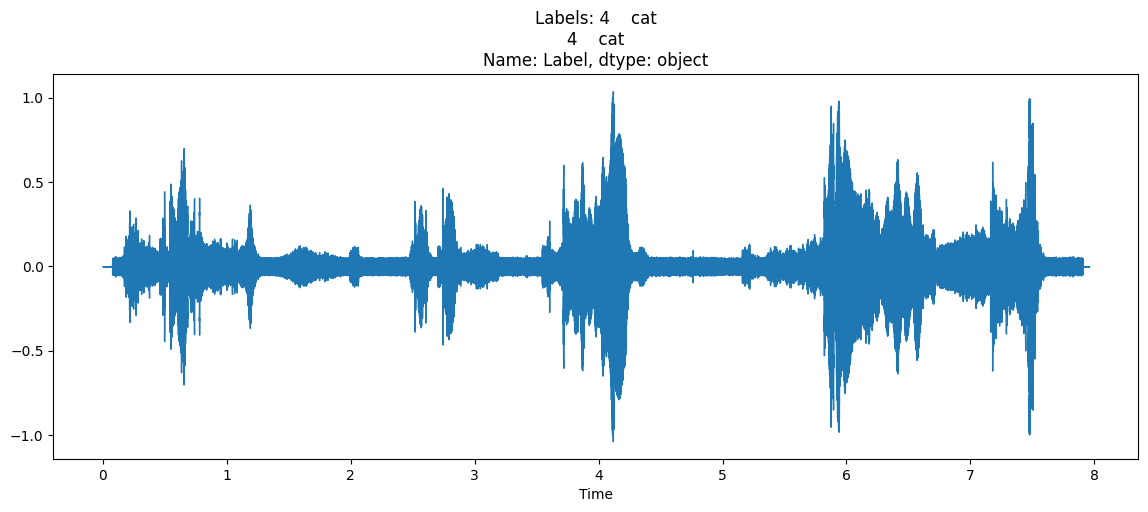

In [17]:
for i in range(5):

    x = df['audio_data'].iloc[i]
    #x = x.astype(float)

    # To convert an array of arrays into a single array
    #x = np.concatenate(x)

    plt.figure(figsize=(14,5))
    plt.title('Labels: '+str(df['Label'][i]))

    librosa.display.waveshow(x)

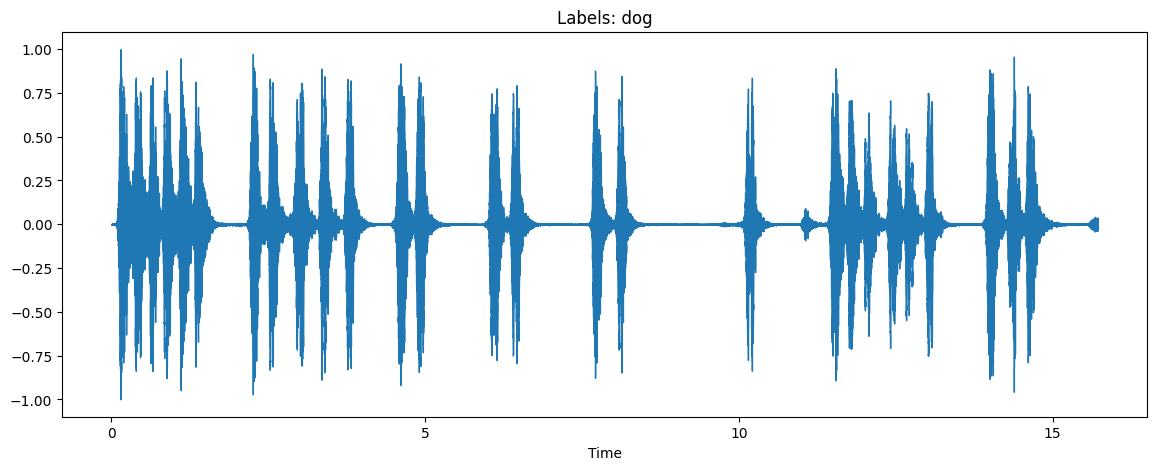

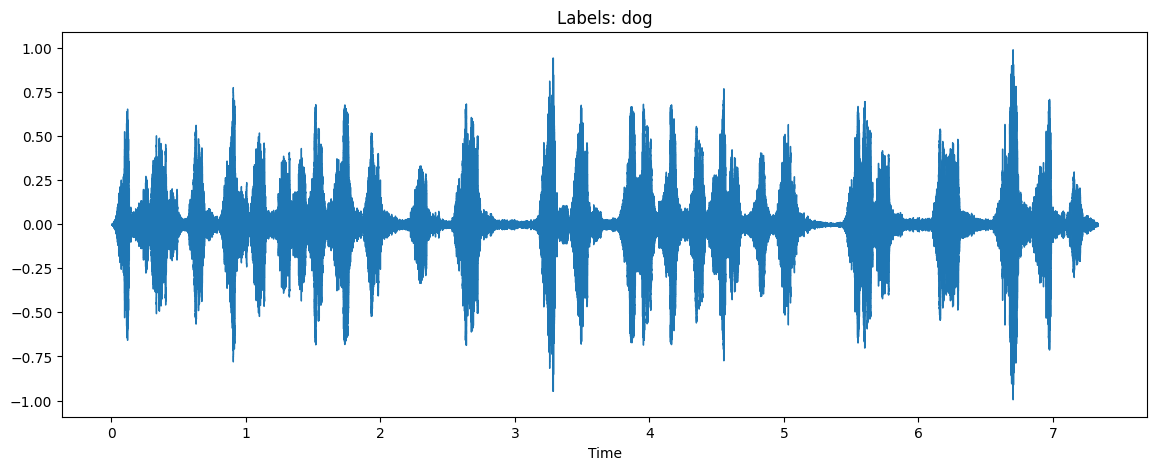

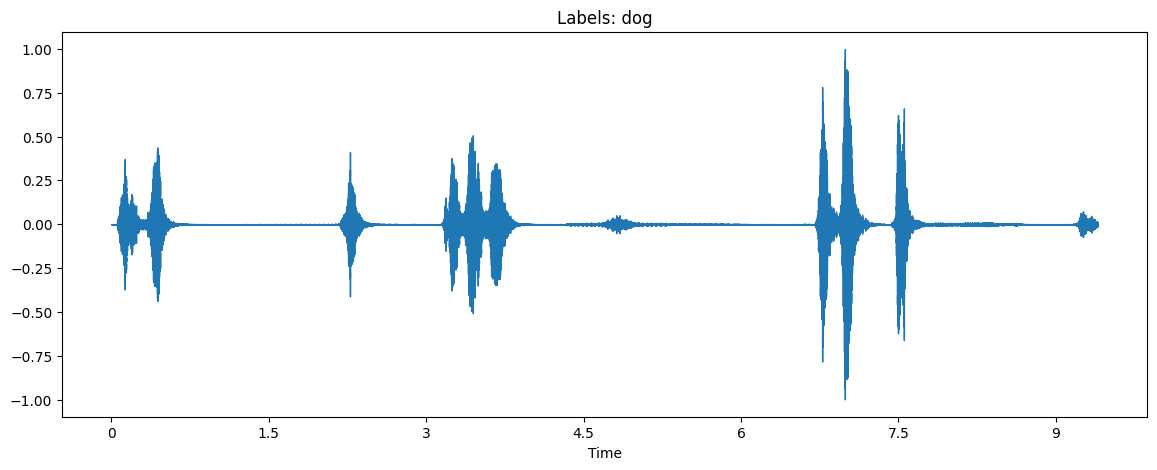

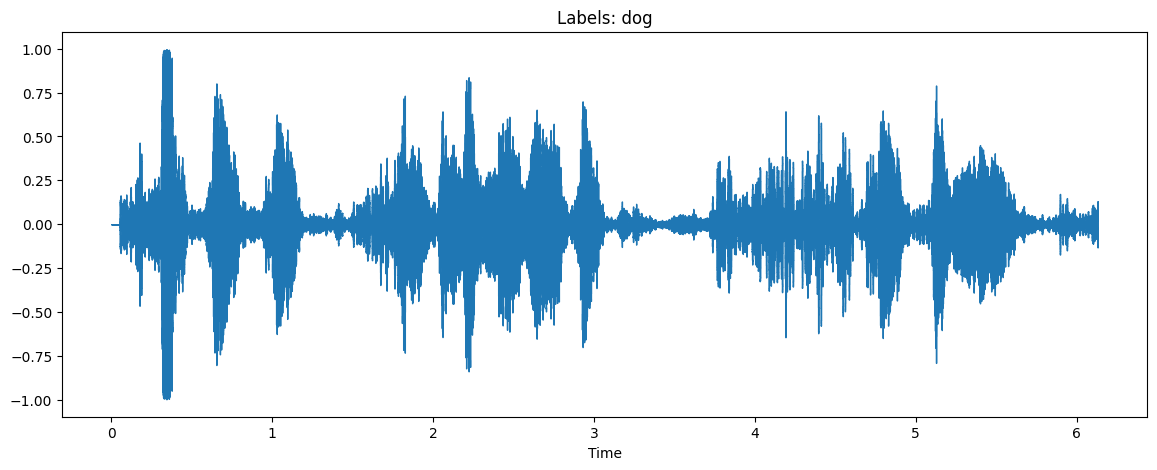

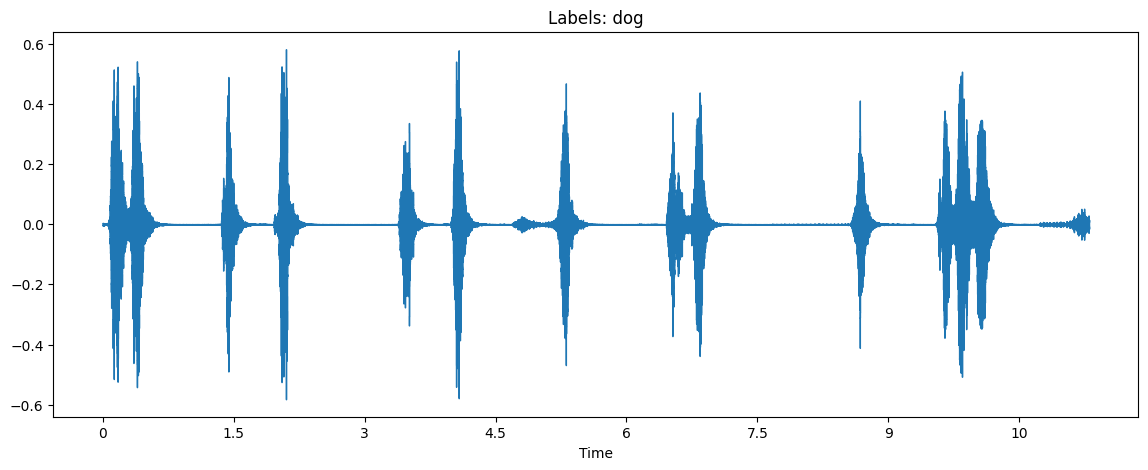

In [18]:
for i in range(5):

    x = df['audio_data'][::-1].iloc[i]

    plt.figure(figsize=(14,5))
    plt.title('Labels: '+str(df['Label'][::-1].iloc[i]))

    librosa.display.waveshow(x)

### Normalization

Normalization in audio signals refers to the process of adjusting the amplitude of an audio signal to a consistent and standardized level. This is done by scaling the audio signal so that its maximum amplitude is equal to a predefined value, such as 0 dBFS (decibels relative to full scale).

Normalization can be performed after resampling, but it is generally done before any further processing or analysis of the audio signal. The reason for this is that normalization helps to ensure that the audio signal is at an appropriate level for subsequent processing steps, which can help to improve the accuracy and reliability of analysis or classification models.

Normalization can be especially useful when working with audio signals that have varying levels of loudness or amplitude. In some cases, audio signals may be recorded at different volumes or with varying levels of background noise, which can make it difficult to compare or analyze the signals accurately. Normalization can help to address this issue by bringing all signals to a consistent level, making it easier to compare and analyze them.

However, it is important to note that normalization can also introduce some distortion or clipping in the audio signal if not done carefully. Therefore, it is important to use a well-designed normalization algorithm and to monitor the signal closely during the process.

Overall, normalization is a useful technique for ensuring that audio signals are at a consistent and appropriate level for subsequent processing steps. It can be particularly useful when working with signals that have varying levels of loudness or amplitude, and can help to improve the accuracy and reliability of analysis or classification models.

In [19]:
desired_max_amplitude = 1

In [20]:
for i in range(335):
  max_amplitude = max(abs(df['audio_data'].iloc[i]))
  normalization_factor = desired_max_amplitude / max_amplitude
  df['audio_data'].iloc[i] = df['audio_data'].iloc[i] * normalization_factor  


In [21]:
df

,audio_data,file_names,file_path,Label
0,"[-0.0072034835, -0.008382406, -0.0071672676, -...",cat_120.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
1,"[2.5620103e-12, 6.6513184e-12, -9.892888e-13, ...",cat_109.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
2,"[1.8074103e-10, 5.646203e-10, 9.930247e-10, 2....",cat_123.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
3,"[-0.00074719865, -0.0032779656, -0.005906673, ...",cat_127.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
4,"[-2.3906052e-11, 2.5153879e-12, -1.3007508e-12...",cat_125.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
...,...,...,...,...
205,"[-0.0005524391, -0.00095446844, -0.00097239617...",dog_barking_92.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog
206,"[-2.9778392e-05, -3.4309214e-05, -1.820759e-05...",dog_barking_98.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog
207,"[-2.6749964e-05, -0.00012703995, -0.0002862349...",dog_barking_93.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog
208,"[0.0006323734, 0.0010282823, 0.0013423797, 0.0...",dog_barking_94.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog


### Resampling

Resampling in audio signals is performed to change the sampling rate of the audio signal. The sampling rate of an audio signal is the number of samples per second that are taken to represent the audio waveform digitally. When resampling, we either increase or decrease the sampling rate of an audio signal.

One reason for resampling audio signals is to change the audio quality, which can impact the perceived audio fidelity. For example, if we decrease the sampling rate of an audio signal, we can reduce the file size and make it easier to transmit over a network or store on a device with limited storage capacity. However, reducing the sampling rate can also reduce the audio quality and introduce distortions and artifacts into the audio signal.

On the other hand, increasing the sampling rate of an audio signal can improve the audio quality by reducing quantization errors and making it possible to capture high-frequency components of the audio signal. This is particularly useful when working with high-quality audio sources, such as those used in music production or mastering.

We might need to perform resampling in audio signals if we want to change the sampling rate of the audio signal for a specific application or if we are working with audio files that have different sampling rates. For example, if we want to mix audio files that have different sampling rates, we need to resample them to a common sampling rate so that they can be played back synchronously. Additionally, if we want to use an audio signal for a particular application that requires a specific sampling rate, we may need to resample the audio signal to match the required sampling rate.

In [22]:
sr

22050

In [23]:
df['audio_data'].iloc[0]

array([-7.2034835e-03, -8.3824061e-03, -7.1672676e-03, ...,
       -2.2406150e-04, -4.9060935e-05, -2.6433638e-05], dtype=float32)

In [24]:
for i in range(335):
  df['audio_data'].iloc[i] = librosa.resample(df['audio_data'].iloc[i], orig_sr = sr, target_sr = 24000)

In [25]:
df

,audio_data,file_names,file_path,Label
0,"[-0.006851752, -0.008529167, -0.007063438, -0....",cat_120.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
1,"[3.5158293e-12, 7.468003e-12, 5.553313e-13, -5...",cat_109.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
2,"[3.6220293e-10, 4.675264e-10, 9.2909935e-10, 4...",cat_123.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
3,"[-0.00069350196, -0.002945376, -0.006105449, 0...",cat_127.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
4,"[-2.4380331e-11, 1.713964e-12, 2.8283597e-12, ...",cat_125.wav,/content/drive/My Drive/cats_dogs/train/cat/ca...,cat
...,...,...,...,...
205,"[-0.0005301495, -0.0009371977, -0.00097620074,...",dog_barking_92.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog
206,"[-2.8339113e-05, -3.5131743e-05, -2.0840078e-0...",dog_barking_98.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog
207,"[-2.6038151e-05, -0.00011530731, -0.0002616377...",dog_barking_93.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog
208,"[0.00060352124, 0.0010054301, 0.0012792023, 0....",dog_barking_94.wav,/content/drive/My Drive/cats_dogs/train/dog/do...,dog


Now we will define window size and Hop length

The window size and hop length are key parameters in audio feature extraction. They determine how we divide the audio signal into short, overlapping frames for analysis.

The window size determines the length of each frame in seconds. A longer window size provides more frequency resolution, allowing us to capture more detailed spectral features. However, a longer window size also results in lower time resolution, as each frame covers a larger time interval. On the other hand, a shorter window size provides better time resolution, allowing us to capture more detailed temporal features, but at the cost of lower frequency resolution. In general, the optimal window size depends on the specific task and the characteristics of the audio signal.

The hop length determines the amount of overlap between adjacent frames. A shorter hop length results in more overlap, providing more temporal continuity between adjacent frames. However, this also increases the computational cost of feature extraction, as we compute features for more frames. A longer hop length results in less overlap, providing less temporal continuity, but also reduces the computational cost of feature extraction.

### Spectrogram visualization

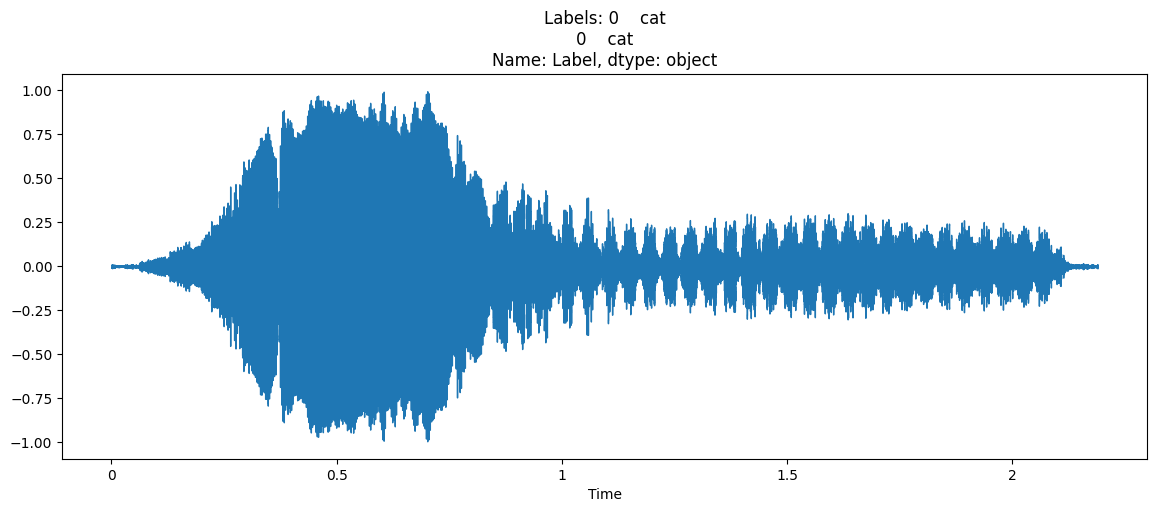

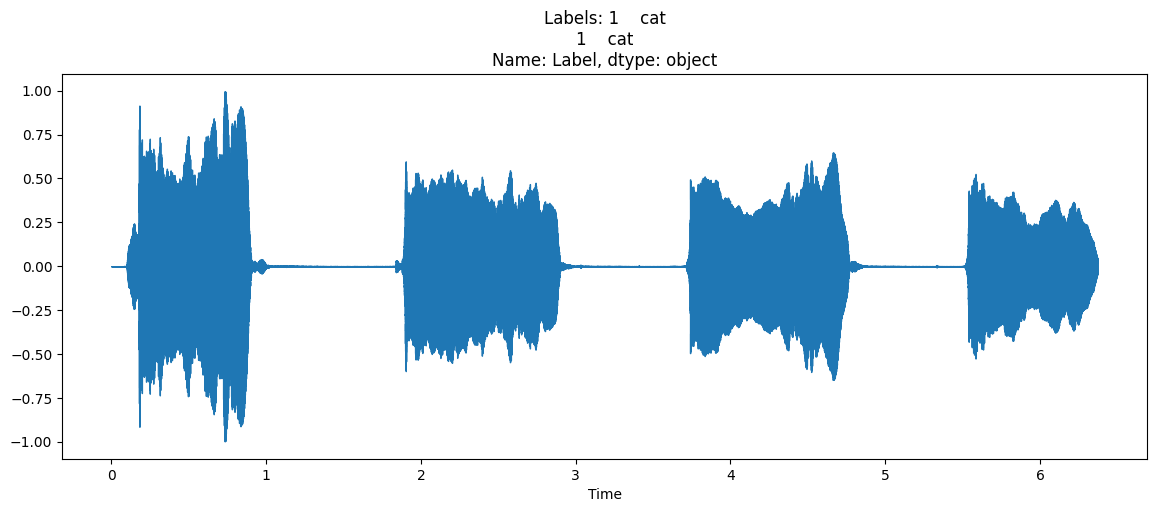

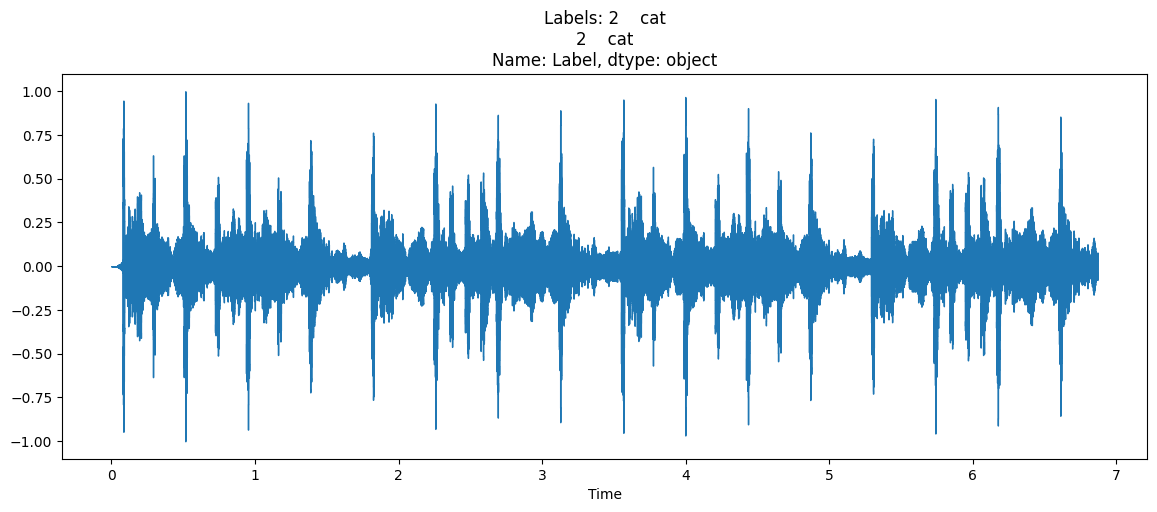

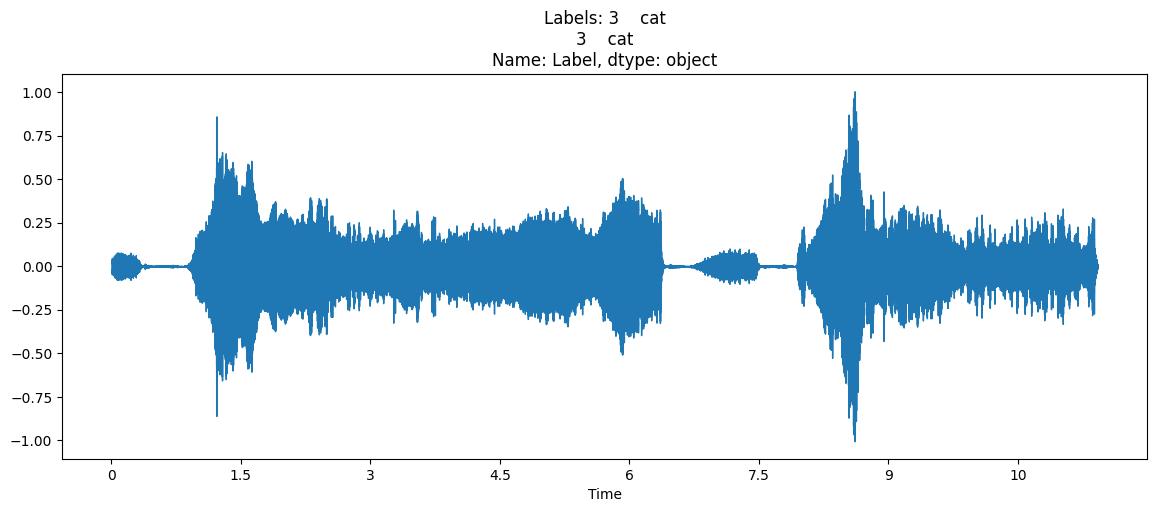

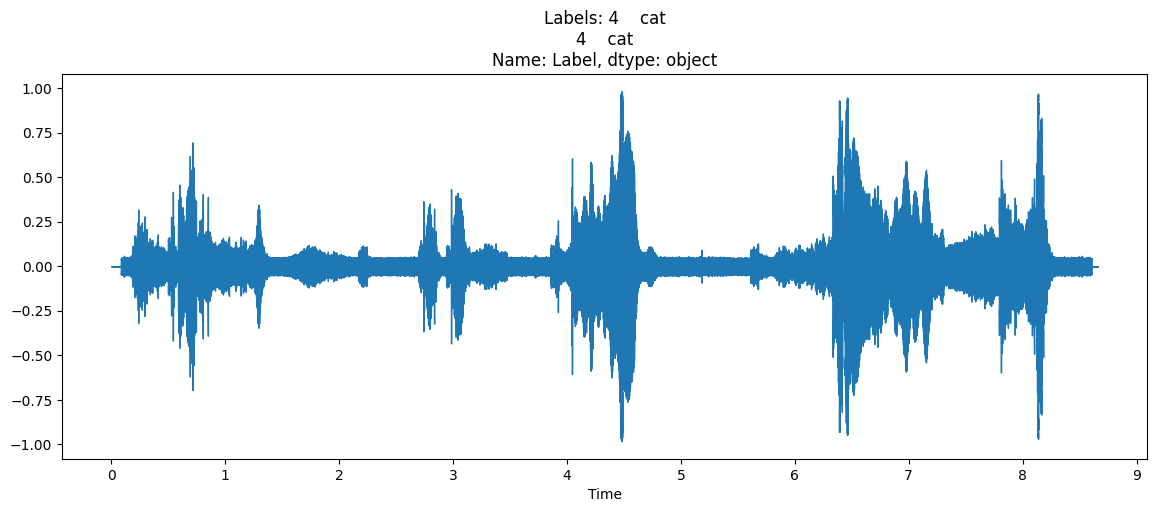

In [26]:
for i in range(5):

    x = df['audio_data'].iloc[i]
    #x = x.astype(float)

    # To convert an array of arrays into a single array
    #x = np.concatenate(x)

    plt.figure(figsize=(14,5))
    plt.title('Labels: '+str(df['Label'][i]))

    librosa.display.waveshow(x)

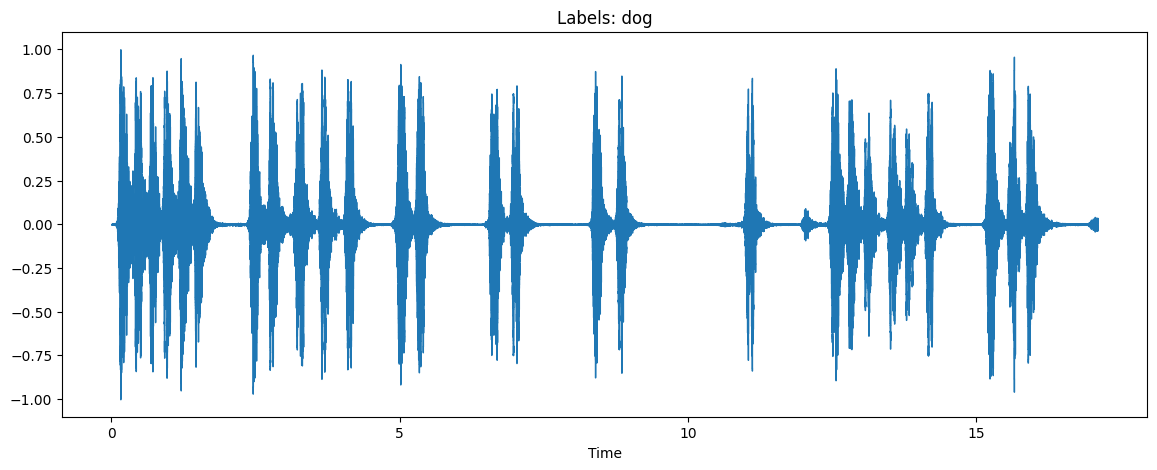

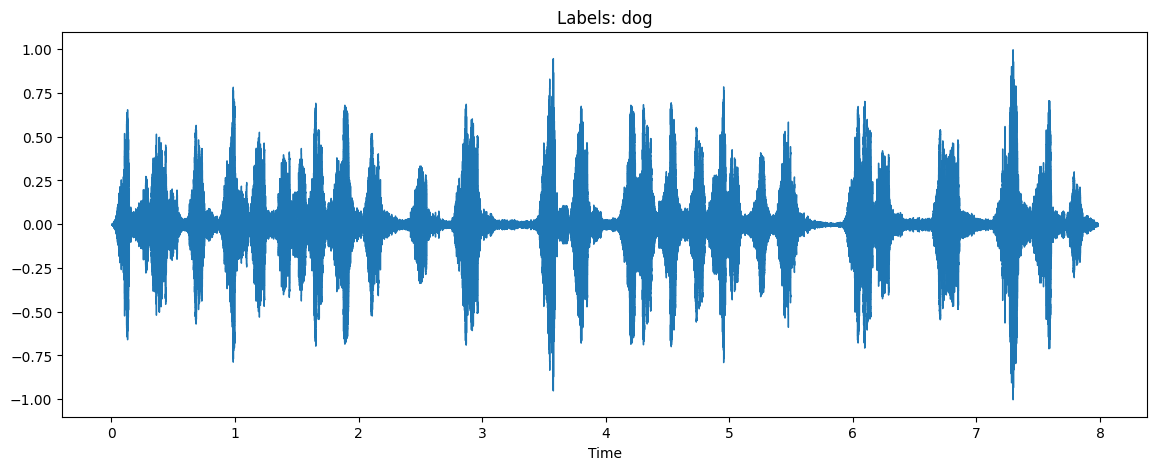

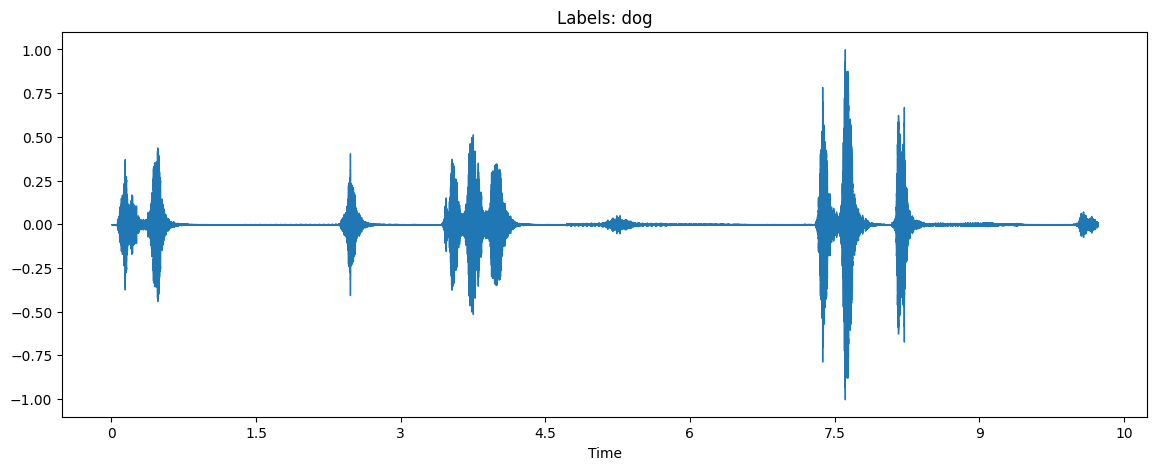

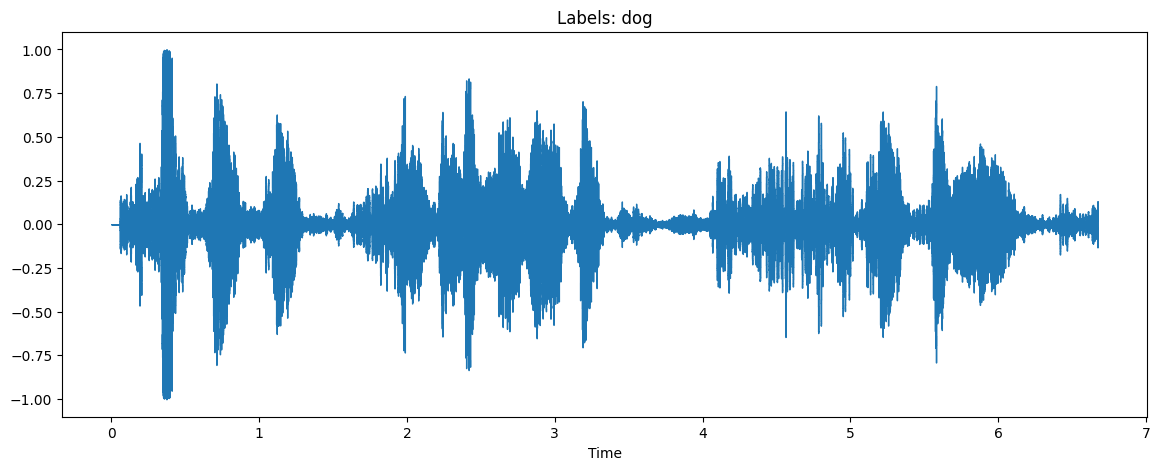

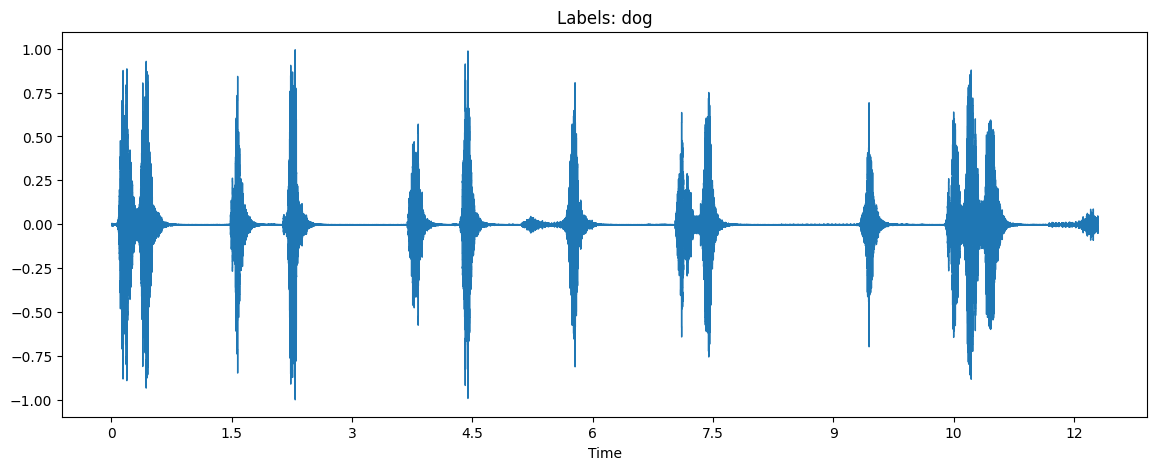

In [27]:
for i in range(5):

    x = df['audio_data'][::-1].iloc[i]

    plt.figure(figsize=(14,5))
    plt.title('Labels: '+str(df['Label'][::-1].iloc[i]))

    librosa.display.waveshow(x)

### Feature Extraction - MFCC, PSD, Spectral Centroid

In [28]:
win_size = int(0.025 * sr)
hop_length = int(0.010 * sr) 

In [29]:
feature_matrix = []

In [30]:
for i in range(335):

  # MFCCS
  mfccs = librosa.feature.mfcc(y=df['audio_data'].iloc[i], sr=sr, n_mfcc=13, n_fft=win_size, hop_length=hop_length)

  # SPECTRAL CENTROID
  spectral_centroid = librosa.feature.spectral_centroid(y=df['audio_data'].iloc[i], sr=sr, n_fft=win_size, hop_length=hop_length)

  # POWER SPECTRAL DENSITY
  psd = np.abs(librosa.stft(y=df['audio_data'].iloc[i], n_fft=win_size, hop_length=hop_length))**2

  mfccs_mean = np.mean(mfccs, axis=1)
  spectral_centroid_mean = np.mean(spectral_centroid)
  psd_mean = np.mean(psd, axis=1)

  feature_vector = np.concatenate([mfccs_mean, [spectral_centroid_mean], psd_mean])

  feature_matrix.append(feature_vector)

In [31]:
feature_matrix = np.array(feature_matrix)

In [32]:
m,n = feature_matrix.shape

### Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

# Splitting our Dataset

In [35]:
X = feature_matrix
y = df['Label']

In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
205    1
206    1
207    1
208    1
209    1
Name: Label, Length: 335, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

We have set stratify=y to perform a stratified split based on the label vector y. This ensures that the training and testing sets have approximately the same proportion of samples from each class.

In [38]:
import matplotlib.pyplot as plt
import plotly.express as px

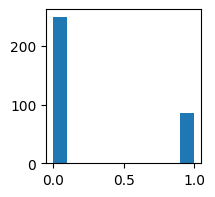

In [39]:
fig = plt.figure(figsize =(2,2))
plt.hist(df['Label'])
plt.show()

In [40]:
fig = plt.figure(figsize =(2,2))
fig = px.histogram(df['Label'])
fig.show()

<Figure size 200x200 with 0 Axes>

In [41]:
df['Label'].value_counts()

0    250
1     85
Name: Label, dtype: int64

Since we don't have balanced data, we will use stratified method for splitting our data.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modeling and Training

In [43]:
import tensorflow as tf
import keras

In [44]:
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [45]:
num_classes = df['Label'].nunique()

#### Building CNN Architecture

In [46]:
X.shape, y.shape

((335, 290), (335,))

In [47]:
model = Sequential()

model.add(Dense(64, input_dim=290,  activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(46, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

#### Compiling model

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy()])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                18624     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 46)                2990      
                                                                 
 dropout_1 (Dropout)         (None, 46)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1504      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

#### Training the model

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((268, 290), (268,), (67, 290), (67,))

In [51]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 2s 35ms/step - loss: 12.3092 - binary_accuracy: 0.6306 - val_loss: 6.7642 - val_binary_accuracy: 0.7463
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 9.4049 - binary_accuracy: 0.7052 - val_loss: 3.5016 - val_binary_accuracy: 0.7761
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 5.2335 - binary_accuracy: 0.7612 - val_loss: 1.3086 - val_binary_accuracy: 0.8060
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 5.1929 - binary_accuracy: 0.7649 - val_loss: 0.7526 - val_binary_accuracy: 0.8955
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 2.9807 - binary_accuracy: 0.8060 - val_loss: 0.5207 - val_binary_accuracy: 0.9104
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 3.5608 - binary_accuracy: 0.8022 - val_loss: 0.3651 - val_binary_accuracy: 0.9403
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 3.7427 - 

# Evaluating our model and Visualizing Accuracies

<Axes: >

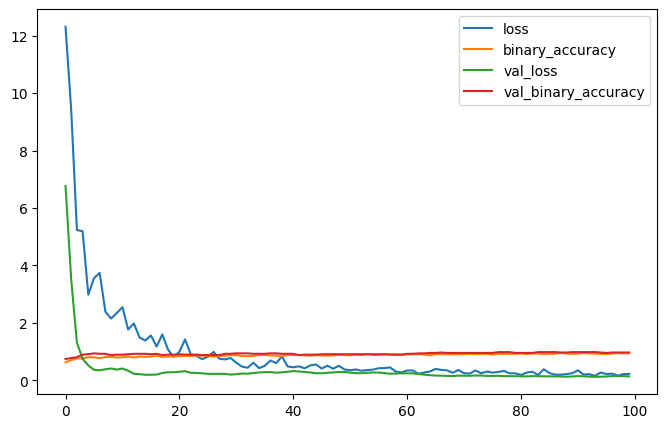

In [52]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [53]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))
score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))

Training Accuracy: 96.27%
Testing Accuracy: 97.01%
